# Simulation Comparison

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import griddata


In [2]:
# define path to raw MATLAB simulation data
path = "../SimulationModel/matlab_results_exp_setting.csv"

# load raw MATLAB simulation data
raw_sim_data_exp_setting = pd.read_csv(path)
raw_sim_data_sim_setting = pd.read_csv(path.replace("exp_setting", "sim_setting"))

print("raw simulation data shape: ", raw_sim_data_exp_setting.shape)
print("raw simulation data shape: ", raw_sim_data_sim_setting.shape)

raw simulation data shape:  (8577, 44)
raw simulation data shape:  (8577, 44)


In [5]:
# extract data from raw simulation data
def extract_data(raw_sim_data):
    x = raw_sim_data['X'].values  # x-coordinates of nodes
    y = raw_sim_data['Y'].values  # y-coordinates of nodes
    temperatures = raw_sim_data.iloc[:, 4:].values  # temperature of nodes
    t_str = raw_sim_data.columns.to_list()[4:] # timesteps
    t = [np.float_(col.split('_')[1]) for col in t_str]
    return x, y, temperatures, t

x_m_exp_setting, y_m_exp_setting, temperatures_m_exp_setting, t_m_exp_setting = extract_data(raw_sim_data_exp_setting)
x_m_sim_setting, y_m_sim_setting, temperatures_m_sim_setting, t_m_sim_setting = extract_data(raw_sim_data_sim_setting)

print(f"loaded data exp setting: {x_m_exp_setting.shape}, {y_m_exp_setting.shape}, {temperatures_m_exp_setting.shape} ")
print(f"loaded data sim setting: {x_m_sim_setting.shape}, {y_m_sim_setting.shape}, {temperatures_m_sim_setting.shape} ")

loaded data exp setting: (8577,), (8577,), (8577, 40) 
loaded data sim setting: (8577,), (8577,), (8577, 40) 


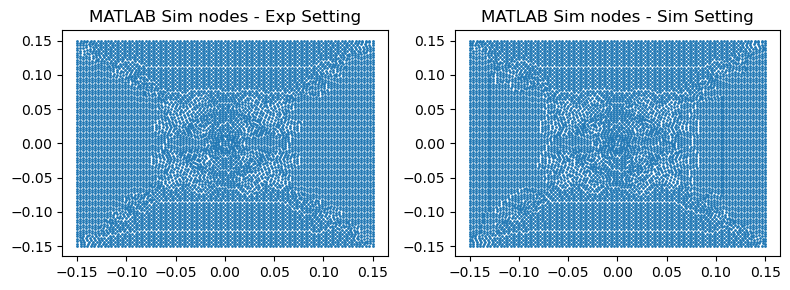

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns

# matlab exp setting
axes[0].scatter(x_m_exp_setting, y_m_exp_setting, s=1)
axes[0].set_title("MATLAB Sim nodes - Exp Setting")

# matlab sim setting
axes[1].scatter(x_m_sim_setting, y_m_sim_setting, s=1)
axes[1].set_title("MATLAB Sim nodes - Sim Setting")

plt.tight_layout()
plt.show()

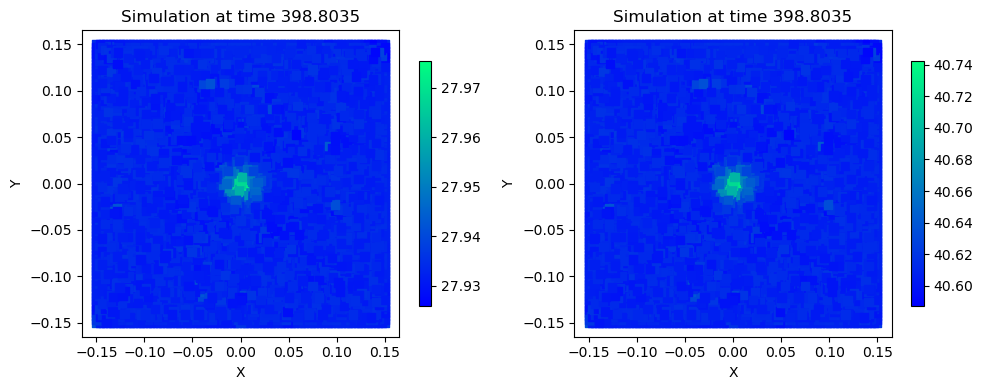

In [15]:

timestep = 29 # choose specific timeframe

x1, y1, temp1 = x_m_exp_setting, y_m_exp_setting, temperatures_m_exp_setting[:, timestep]
x2, y2, temp2 = x_m_sim_setting, y_m_sim_setting, temperatures_m_sim_setting[:, timestep]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# exp setting heatmap
sc1 = axes[0].scatter(x1, y1, c=temp1, cmap='winter', marker='s')
axes[0].set_title(f"Simulation at time {t_m_exp_setting[timestep]}")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")

# sim setting heatmap
sc2 = axes[1].scatter(x2, y2, c=temp2, cmap='winter', marker='s')
axes[1].set_title(f"Simulation at time {t_m_sim_setting[timestep]}")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")

fig.colorbar(sc1, ax=axes[0], shrink=0.8)
fig.colorbar(sc2, ax=axes[1], shrink=0.8)

plt.tight_layout()
plt.show()

In [ ]:
# load interpolated simulation data for both settings
matlab_exp_setting = np.load("../SimulationModel/matlab_results_exp_setting.npy")
matlab_sim_setting = np.load("../SimulationModel/matlab_results_sim_setting.npy")

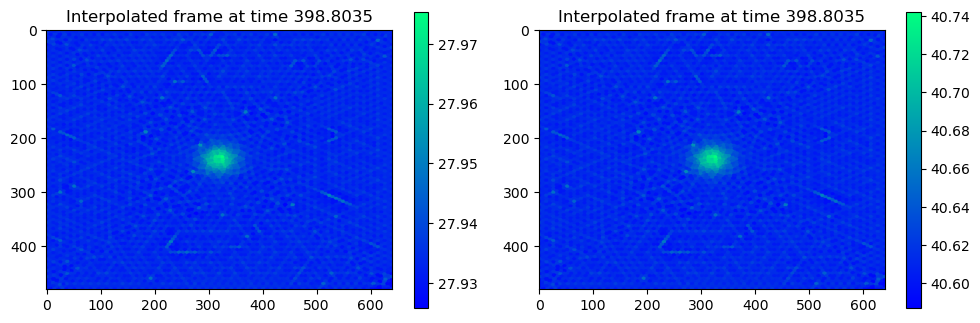

In [20]:
# plot interpolated frames
sim_setting_frame = matlab_sim_setting[timestep, :].reshape((480, 640))
exp_setting_frame = matlab_exp_setting[timestep, :].reshape((480, 640))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# exp setting heatmap
im1 = axes[0].imshow(exp_setting_frame, cmap='winter')
axes[0].set_title(f"Interpolated frame at time {t_m_exp_setting[timestep]}")
fig.colorbar(im1, ax=axes[0], shrink=0.8)

# sim setting heatmap
im2 = axes[1].imshow(sim_setting_frame, cmap='winter')
axes[1].set_title(f"Interpolated frame at time {t_m_sim_setting[timestep]}")
fig.colorbar(im2, ax=axes[1], shrink=0.8)

plt.tight_layout()
plt.show()

## Ansys Interpolation & Comparison to MATLAB

In [ ]:
# load experimental data
data_path = "/Users/kelseypenners/Library/CloudStorage/OneDrive-TUEindhoven/Li, Muyao's files - 5ARIP10 shared data/Experimental data/resin plates"
files = os.listdir(data_path)

npy_path = os.path.join(data_path, files[0])
experimental_data = np.load(npy_path)

In [133]:
# load ansys simulation data
path = "../SimulationModel/ansys_results.csv"
ansys_data = pd.read_csv(path)
matlab_data = raw_sim_data

In [121]:
print("composite plate npy shape: ", experimental_data.shape)
print("ansys simulation data shape: ", ansys_data.shape)
print("MATLAB simulation data shape: ", matlab_data.shape)

composite plate npy shape:  (1324, 307200)
ansys simulation data shape:  (7825, 34)
MATLAB simulation data shape:  (8577, 44)


### Ansys Data Interpolation

In [122]:
# extract coordinates and temperatures
x_ansys = ansys_data['Xloc'].values  # x-coordinates of nodes
y_ansys= ansys_data['Yloc'].values  # y-coordinates of nodes
temperatures_ansys = ansys_data.iloc[:, :-3].values  # temperature of nodes
t_ansys = ansys_data.columns.to_list()[:-3] # timesteps
t_ansys = list(np.float_(t_ansys))
num_time_steps = len(t_ansys)

print(f"loaded ansys data: {x_ansys.shape}, {y_ansys.shape}, {temperatures_ansys.shape} ")
print(f"loaded matlab data: {x.shape}, {y.shape}, {temperatures.shape}")

loaded ansys data: (7825,), (7825,), (7825, 31) 
loaded matlab data: (8577,), (8577,), (8577, 40)


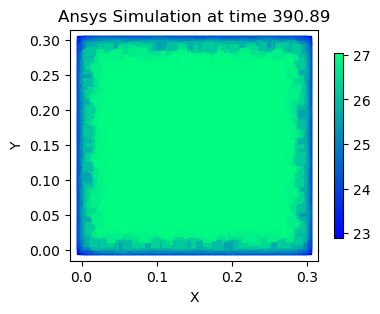

In [123]:
 # choose specific timeframe
ansys_timestep = 23
temp_at_timestep = temperatures_ansys[:, ansys_timestep]  # Get temperature values for the chosen frame

# plot the raw scattered data
plt.figure(figsize=(4, 3))
sc = plt.scatter(x_ansys, y_ansys, c=temp_at_timestep, cmap='winter', marker='s')
plt.colorbar(sc, shrink=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Ansys Simulation at time {t_ansys[ansys_timestep]}")
plt.show()

In [124]:
# create meshgrid for pixel data
grid_x, grid_y = np.meshgrid(
    np.linspace(x_ansys.min(), x_ansys.max(), 640),
    np.linspace(y_ansys.min(), y_ansys.max(), 480)
)

# initialize pixel grid for temperatures
ansys_grid_temperatures = np.zeros((grid_x.shape[0], grid_x.shape[1], num_time_steps))

# interpolate temperatures for each time step
for i in range(num_time_steps):
    ansys_grid_temperatures [:,:,i] = griddata(
    points=(x_ansys, y_ansys), # input coordinates
    values=temperatures_ansys[:,i], # temperatures at input coordinates
    xi=(grid_x, grid_y), # grid coordinates for interpolation
    method='nearest'  
)

print("interpolated temperatures: ", ansys_grid_temperatures.shape)

interpolated temperatures:  (480, 640, 31)


In [125]:
# transpose to make time axis the first dimension
ansys_grid_transposed = np.transpose(ansys_grid_temperatures, (2, 0, 1))

# flatten the grid to have shape (time steps, 307200)
ansys_flattened_temperatures = ansys_grid_transposed.reshape(num_time_steps, -1)  
print("final shape: ", ansys_flattened_temperatures.shape) # should be (num time steps, 307200)


final shape:  (31, 307200)


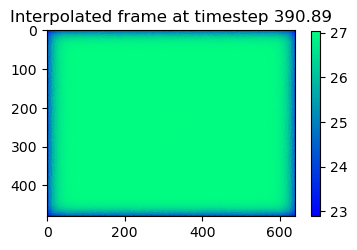

In [126]:
# plot interpolated frame
ansys_frame = ansys_flattened_temperatures[ansys_timestep, :].reshape((480, 640))

plt.figure(figsize=(4,3))
plt.imshow(ansys_frame, cmap='winter')
plt.colorbar(shrink=0.8)
plt.title(f"Interpolated frame at timestep {t_ansys[ansys_timestep]}")
plt.show()

### Simulations and Experimental Data Comparison

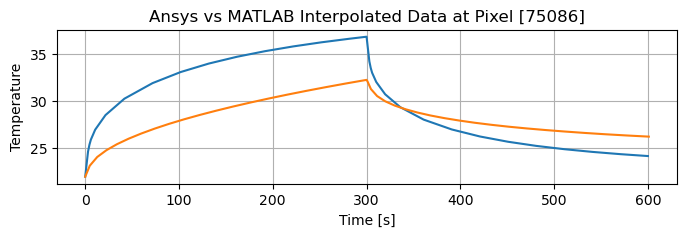

In [127]:
pixel =  np.random.choice(307200, 1)
p_ansys = ansys_flattened_temperatures[:,pixel]  
p_matlab = flattened_temperatures[:,pixel]

plt.figure(figsize=(8,2))
plt.plot(t_ansys, p_ansys)
plt.plot(t_matlab, p_matlab)
plt.xlabel('Time [s]')
plt.ylabel('Temperature')
plt.grid('on')
plt.title(f"Ansys vs MATLAB Interpolated Data at Pixel {pixel}")
plt.show()


In [128]:

def plot_pixel_temp(pixel_id, temps, timesteps, labels):
    plt.figure(figsize=(8,2))
    for i in range(len(temps)):
        temperatures = temps[i]
        plt.plot(timesteps[i], temperatures[:,pixel_id], label=labels[i])
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel('Temperature')
    plt.grid('on')
    plt.title(f"Temperature at pixel {pixel_id}")
    plt.show()


Pixel Comparison: 


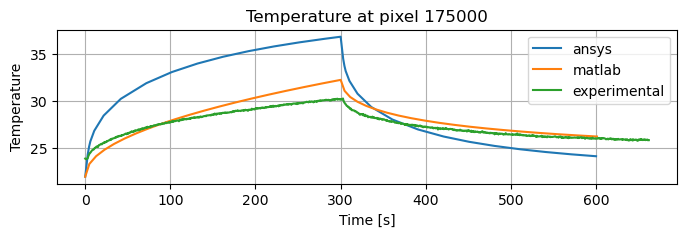

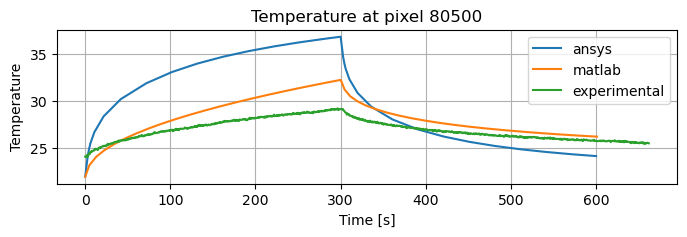

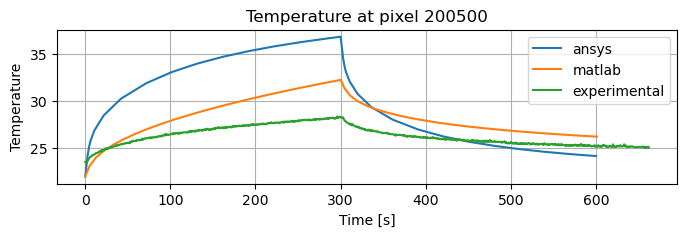

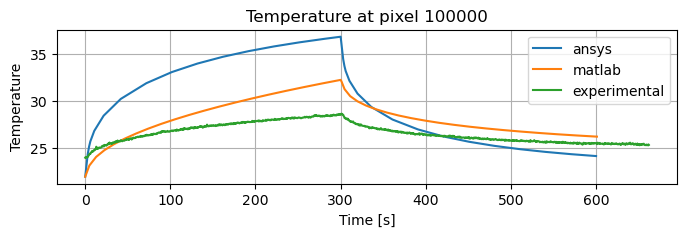

In [129]:
# plot various pixel temperatures over time
pixels = [175000, 80500, 200500, 100000]
temps = [ansys_flattened_temperatures, flattened_temperatures, experimental_data]
timesteps = [t_ansys, 
             t_matlab,
             np.linspace(0, experimental_data.shape[0]*0.5, experimental_data.shape[0])]
labels = ["ansys", "matlab", "experimental"]
print("Pixel Comparison: ")
for pixel in pixels:
    plot_pixel_temp(pixel, temps, timesteps, labels)


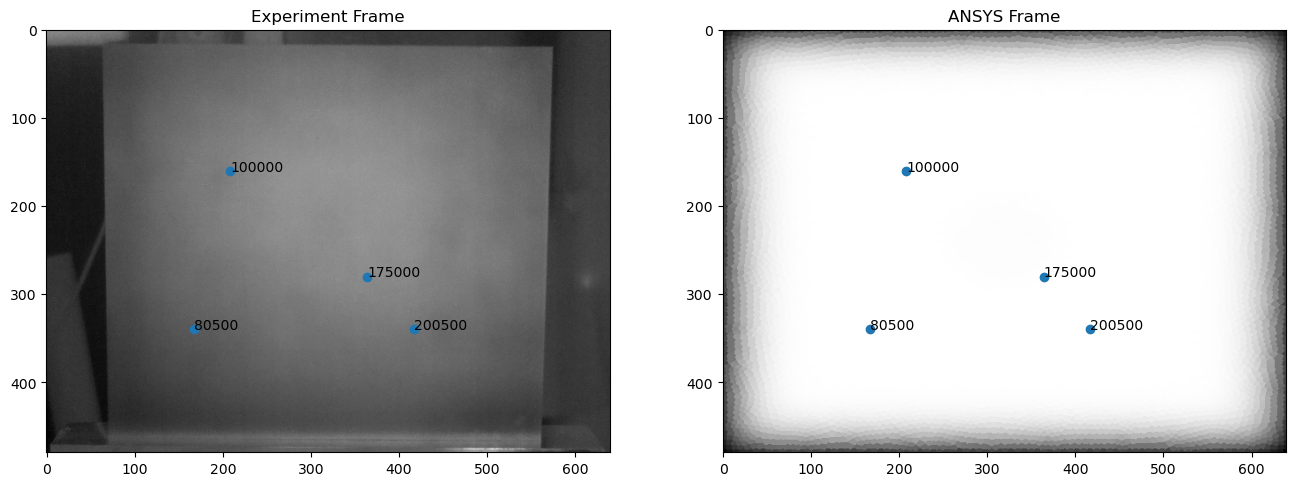

In [130]:
# plot pixel locations on a frame
frame = experimental_data[timestep, :].reshape(480, 640)
ansys_frame = ansys_flattened_temperatures[timestep, :].reshape(480, 640)

plt.figure(figsize=(16, 12))

x = []
y = []
for pixel in pixels:
    row, col = divmod(pixel, 480)
    x.append(row)
    y.append(col)

plt.subplot(1, 2, 1)  # First plot
plt.scatter(x, y, label=pixels)
for i, txt in enumerate(pixels):
    plt.annotate(txt, (x[i], y[i]))
plt.imshow(frame, cmap='grey')
plt.title("Experiment Frame")

plt.subplot(1, 2, 2)  # Second plot
plt.scatter(x, y, label=pixels)
for i, txt in enumerate(pixels):
    plt.annotate(txt, (x[i], y[i]))
plt.imshow(ansys_frame, cmap='grey')
plt.title("ANSYS Frame")

plt.show()